In [1]:
!pip install statsmodels
!pip install wquantiles
import pandas as pd
import numpy as np
from statsmodels import robust
import wquantiles
from scipy.stats import trim_mean
import seaborn as sns
import matplotlib.pyplot as plt

##Cargamos Base de Datos

In [55]:
# importamos la base de datos
CausasMuerte = pd.read_csv("/content/annual_deaths_by_causes.csv")

In [56]:
#Ya que la base de datos es en ingles realizamos el cambio de nombre de las columnas a español
colmuns_name = ['pais',
                'codigo',
                'año',
                'por_meningitis',
                'por_alzheimer',
                'por_parkinson',
                'por_deficiencia_nutricional',
                'por_malaria',
                'por_ahogo',
                'por_violencia_interpersonal',
                'por_trastornos_maternos',
                'por_vih_sida',
                'por_uso_drogas',
                'por_tuberculosis',
                'por_enfermedades_cardiovasculares',
                'por_infecciones_respiratorias_leves',
                'por_trastornos_neonatales',
                'por_uso_alcohol',
                'por_autolesiones',
                'por_fuerzas_de_la_naturaleza',
                'por_enfermedades__diarreicas',
                'por_exposicion_al_calor_o_frio',
                'por_neoplasias',
                'por_guerras_terrorismo',
                'por_diabetes_mellitus',
                'por_enfermerdad_renal_cronica',
                'por_envenenamiento',
                'por_desnutricion',
                'por_terrorismo',
                'por_accidentes_de_transito',
                'por_enfermerdades_respirtatorias_cronicas',
                'por_enfermedades_linfaticas_cronicas',
                'por_enfermedades_digestivas',
                'por_sustancias_de_calor_fuego',
                'por_hepatitis_aguda'
                ]

df_causas_muertes = CausasMuerte
df_causas_muertes.columns = colmuns_name


Realizamos una suma de todas las causas de muerte por pais para poder tener un dato a comparar y lo agregamos como ultima columna en la base de datos

In [5]:
CausasMuerte['TotalMuertos'] = CausasMuerte[['por_meningitis',
                'por_alzheimer',
                'por_parkinson',
                'por_deficiencia_nutricional',
                'por_malaria',
                'por_ahogo',
                'por_violencia_interpersonal',
                'por_trastornos_maternos',
                'por_vih_sida',
                'por_uso_drogas',
                'por_tuberculosis',
                'por_enfermedades_cardiovasculares',
                'por_infecciones_respiratorias_leves',
                'por_trastornos_neonatales',
                'por_uso_alcohol',
                'por_autolesiones',
                'por_fuerzas_de_la_naturaleza',
                'por_enfermedades__diarreicas',
                'por_exposicion_al_calor_o_frio',
                'por_neoplasias',
                'por_guerras_terrorismo',
                'por_diabetes_mellitus',
                'por_enfermerdad_renal_cronica',
                'por_envenenamiento',
                'por_desnutricion',
                'por_terrorismo',
                'por_accidentes_de_transito',
                'por_enfermerdades_respirtatorias_cronicas',
                'por_enfermedades_linfaticas_cronicas',
                'por_enfermedades_digestivas',
                'por_sustancias_de_calor_fuego',
                'por_hepatitis_aguda']].fillna(0).sum(axis=1)
CausasMuerte

,pais,codigo,año,por_meningitis,por_alzheimer,por_parkinson,por_deficiencia_nutricional,por_malaria,por_ahogo,por_violencia_interpersonal,...,por_envenenamiento,por_desnutricion,por_terrorismo,por_accidentes_de_transito,por_enfermerdades_respirtatorias_cronicas,por_enfermedades_linfaticas_cronicas,por_enfermedades_digestivas,por_sustancias_de_calor_fuego,por_hepatitis_aguda,TotalMuertos
0,Afghanistan,AFG,2007,2933.0,1402.0,450.0,2488.0,393.0,2127.0,3657.0,...,512.0,2439.0,1199.0,7425.0,7222.0,3346.0,6458.0,481.0,3437.0,204796.0
1,Afghanistan,AFG,2008,2731.0,1424.0,455.0,2277.0,255.0,1973.0,3785.0,...,495.0,2231.0,1092.0,7355.0,7143.0,3316.0,6408.0,462.0,3005.0,200209.0
2,Afghanistan,AFG,2009,2460.0,1449.0,460.0,2040.0,239.0,1852.0,3874.0,...,483.0,1998.0,1065.0,7290.0,7045.0,3291.0,6358.0,448.0,2663.0,195927.0
3,Afghanistan,AFG,2011,2327.0,1508.0,473.0,1846.0,390.0,1775.0,4170.0,...,483.0,1805.0,1525.0,7432.0,6916.0,3318.0,6370.0,448.0,2365.0,196559.0
4,Afghanistan,AFG,2012,2254.0,1544.0,482.0,1705.0,94.0,1716.0,4245.0,...,482.0,1667.0,3521.0,7494.0,6878.0,3353.0,6398.0,445.0,2264.0,200364.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7268,Zimbabwe,ZWE,2015,1439.0,754.0,215.0,3019.0,2518.0,770.0,1302.0,...,381.0,2990.0,NaN,2373.0,2751.0,1956.0,4202.0,632.0,146.0,130080.0
7269,Zimbabwe,ZWE,2016,1457.0,767.0,219.0,3056.0,2050.0,801.0,1342.0,...,393.0,3027.0,NaN,2436.0,2788.0,1962.0,4264.0,648.0,146.0,128274.0
7270,Zimbabwe,ZWE,2017,1460.0,781.0,223.0,2990.0,2116.0,818.0,1363.0,...,398.0,2962.0,0.0,2473.0,2818.0,2007.0,4342.0,654.0,144.0,126515.0
7271,Zimbabwe,ZWE,2018,1450.0,795.0,227.0,2918.0,2088.0,825.0,1396.0,...,400.0,2890.0,NaN,2509.0,2849.0,2030.0,4377.0,657.0,139.0,123506.0


##Analisis Dataframe

In [6]:
#Ver los primeros 5 registros
CausasMuerte.head()

,pais,codigo,año,por_meningitis,por_alzheimer,por_parkinson,por_deficiencia_nutricional,por_malaria,por_ahogo,por_violencia_interpersonal,...,por_envenenamiento,por_desnutricion,por_terrorismo,por_accidentes_de_transito,por_enfermerdades_respirtatorias_cronicas,por_enfermedades_linfaticas_cronicas,por_enfermedades_digestivas,por_sustancias_de_calor_fuego,por_hepatitis_aguda,TotalMuertos
0,Afghanistan,AFG,2007,2933.0,1402.0,450.0,2488.0,393.0,2127.0,3657.0,...,512.0,2439.0,1199.0,7425.0,7222.0,3346.0,6458.0,481.0,3437.0,204796.0
1,Afghanistan,AFG,2008,2731.0,1424.0,455.0,2277.0,255.0,1973.0,3785.0,...,495.0,2231.0,1092.0,7355.0,7143.0,3316.0,6408.0,462.0,3005.0,200209.0
2,Afghanistan,AFG,2009,2460.0,1449.0,460.0,2040.0,239.0,1852.0,3874.0,...,483.0,1998.0,1065.0,7290.0,7045.0,3291.0,6358.0,448.0,2663.0,195927.0
3,Afghanistan,AFG,2011,2327.0,1508.0,473.0,1846.0,390.0,1775.0,4170.0,...,483.0,1805.0,1525.0,7432.0,6916.0,3318.0,6370.0,448.0,2365.0,196559.0
4,Afghanistan,AFG,2012,2254.0,1544.0,482.0,1705.0,94.0,1716.0,4245.0,...,482.0,1667.0,3521.0,7494.0,6878.0,3353.0,6398.0,445.0,2264.0,200364.0


In [7]:
#Ver los ultimos 4 registros
CausasMuerte.tail(4)

,pais,codigo,año,por_meningitis,por_alzheimer,por_parkinson,por_deficiencia_nutricional,por_malaria,por_ahogo,por_violencia_interpersonal,...,por_envenenamiento,por_desnutricion,por_terrorismo,por_accidentes_de_transito,por_enfermerdades_respirtatorias_cronicas,por_enfermedades_linfaticas_cronicas,por_enfermedades_digestivas,por_sustancias_de_calor_fuego,por_hepatitis_aguda,TotalMuertos
7269,Zimbabwe,ZWE,2016,1457.0,767.0,219.0,3056.0,2050.0,801.0,1342.0,...,393.0,3027.0,NaN,2436.0,2788.0,1962.0,4264.0,648.0,146.0,128274.0
7270,Zimbabwe,ZWE,2017,1460.0,781.0,223.0,2990.0,2116.0,818.0,1363.0,...,398.0,2962.0,0.0,2473.0,2818.0,2007.0,4342.0,654.0,144.0,126515.0
7271,Zimbabwe,ZWE,2018,1450.0,795.0,227.0,2918.0,2088.0,825.0,1396.0,...,400.0,2890.0,NaN,2509.0,2849.0,2030.0,4377.0,657.0,139.0,123506.0
7272,Zimbabwe,ZWE,2019,1450.0,812.0,232.0,2884.0,2068.0,827.0,1434.0,...,405.0,2855.0,NaN,2554.0,2891.0,2065.0,4437.0,662.0,136.0,123540.0


In [8]:
#Ver muestreo de 10 registros
CausasMuerte.sample(10)

,pais,codigo,año,por_meningitis,por_alzheimer,por_parkinson,por_deficiencia_nutricional,por_malaria,por_ahogo,por_violencia_interpersonal,...,por_envenenamiento,por_desnutricion,por_terrorismo,por_accidentes_de_transito,por_enfermerdades_respirtatorias_cronicas,por_enfermedades_linfaticas_cronicas,por_enfermedades_digestivas,por_sustancias_de_calor_fuego,por_hepatitis_aguda,TotalMuertos
4747,Palau,PLW,2007,0.0,2.0,1.0,0.0,0.0,2.0,2.0,...,1.0,0.0,NaN,4.0,15.0,3.0,5.0,1.0,0.0,169.0
750,Bosnia and Herzegovina,BIH,1993,28.0,569.0,199.0,2.0,0.0,92.0,179.0,...,203.0,1.0,NaN,283.0,1292.0,838.0,1452.0,83.0,7.0,36738.0
496,Bangladesh,BGD,2000,3442.0,6160.0,2058.0,28839.0,8967.0,32521.0,3665.0,...,471.0,25104.0,11.0,8246.0,55772.0,26367.0,43037.0,1685.0,5514.0,812044.0
2049,Estonia,EST,2014,6.0,624.0,116.0,2.0,0.0,49.0,57.0,...,6.0,1.0,NaN,92.0,298.0,296.0,592.0,58.0,0.0,15114.0
992,Cambodia,KHM,2004,531.0,867.0,220.0,1222.0,747.0,1462.0,459.0,...,87.0,1125.0,NaN,2802.0,3438.0,6231.0,9775.0,238.0,251.0,105203.0
5459,Serbia,SRB,1999,54.0,1584.0,522.0,13.0,0.0,196.0,470.0,...,66.0,5.0,NaN,1276.0,3878.0,1663.0,3798.0,123.0,11.0,117169.0
187,Angola,AGO,1997,3774.0,373.0,103.0,10507.0,8529.0,1220.0,505.0,...,446.0,10277.0,34.0,6372.0,3151.0,3128.0,5050.0,495.0,610.0,178425.0
4661,OECD Countries,NaN,2011,4799.0,559953.0,107985.0,21964.0,5.0,22159.0,51831.0,...,4695.0,19135.0,NaN,125787.0,570349.0,240971.0,496029.0,12845.0,1080.0,9768635.0
5365,Saudi Arabia,SAU,2012,171.0,1393.0,487.0,67.0,0.0,718.0,368.0,...,219.0,62.0,4.0,18338.0,3312.0,3031.0,3942.0,659.0,58.0,99315.0
644,Benin,BEN,2007,2581.0,448.0,131.0,1077.0,14906.0,390.0,546.0,...,195.0,1039.0,0.0,1536.0,1453.0,1594.0,2661.0,264.0,199.0,77753.0


##Overview Datos

In [9]:
CausasMuerte.columns

Index(['pais', 'codigo', 'año', 'por_meningitis', 'por_alzheimer',
       'por_parkinson', 'por_deficiencia_nutricional', 'por_malaria',
       'por_ahogo', 'por_violencia_interpersonal', 'por_trastornos_maternos',
       'por_vih_sida', 'por_uso_drogas', 'por_tuberculosis',
       'por_enfermedades_cardiovasculares',
       'por_infecciones_respiratorias_leves', 'por_trastornos_neonatales',
       'por_uso_alcohol', 'por_autolesiones', 'por_fuerzas_de_la_naturaleza',
       'por_enfermedades__diarreicas', 'por_exposicion_al_calor_o_frio',
       'por_neoplasias', 'por_guerras_terrorismo', 'por_diabetes_mellitus',
       'por_enfermerdad_renal_cronica', 'por_envenenamiento',
       'por_desnutricion', 'por_terrorismo', 'por_accidentes_de_transito',
       'por_enfermerdades_respirtatorias_cronicas',
       'por_enfermedades_linfaticas_cronicas', 'por_enfermedades_digestivas',
       'por_sustancias_de_calor_fuego', 'por_hepatitis_aguda', 'TotalMuertos'],
      dtype='object')

In [10]:
list(CausasMuerte.columns) #Convertir en listas nombres de columnas

['pais',
 'codigo',
 'año',
 'por_meningitis',
 'por_alzheimer',
 'por_parkinson',
 'por_deficiencia_nutricional',
 'por_malaria',
 'por_ahogo',
 'por_violencia_interpersonal',
 'por_trastornos_maternos',
 'por_vih_sida',
 'por_uso_drogas',
 'por_tuberculosis',
 'por_enfermedades_cardiovasculares',
 'por_infecciones_respiratorias_leves',
 'por_trastornos_neonatales',
 'por_uso_alcohol',
 'por_autolesiones',
 'por_fuerzas_de_la_naturaleza',
 'por_enfermedades__diarreicas',
 'por_exposicion_al_calor_o_frio',
 'por_neoplasias',
 'por_guerras_terrorismo',
 'por_diabetes_mellitus',
 'por_enfermerdad_renal_cronica',
 'por_envenenamiento',
 'por_desnutricion',
 'por_terrorismo',
 'por_accidentes_de_transito',
 'por_enfermerdades_respirtatorias_cronicas',
 'por_enfermedades_linfaticas_cronicas',
 'por_enfermedades_digestivas',
 'por_sustancias_de_calor_fuego',
 'por_hepatitis_aguda',
 'TotalMuertos']

In [11]:
CausasMuerte.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7273 entries, 0 to 7272
Data columns (total 36 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   pais                                       7273 non-null   object 
 1   codigo                                     6206 non-null   object 
 2   año                                        7273 non-null   int64  
 3   por_meningitis                             6840 non-null   float64
 4   por_alzheimer                              6840 non-null   float64
 5   por_parkinson                              6840 non-null   float64
 6   por_deficiencia_nutricional                6840 non-null   float64
 7   por_malaria                                6840 non-null   float64
 8   por_ahogo                                  6840 non-null   float64
 9   por_violencia_interpersonal                6840 non-null   float64
 10  por_trastornos_maternos 

Al utilizar .info obetenemos la información clave del dataset, en este caso observamos que Non-Null Count es menor que el total de filas por lo que tenemos valores faltantes, esto hace que tengamos que imputar valores, proceso que hacemos al momento de realizar el promedio ponderado

In [12]:
CausasMuerte.describe()

,año,por_meningitis,por_alzheimer,por_parkinson,por_deficiencia_nutricional,por_malaria,por_ahogo,por_violencia_interpersonal,por_trastornos_maternos,por_vih_sida,...,por_envenenamiento,por_desnutricion,por_terrorismo,por_accidentes_de_transito,por_enfermerdades_respirtatorias_cronicas,por_enfermedades_linfaticas_cronicas,por_enfermedades_digestivas,por_sustancias_de_calor_fuego,por_hepatitis_aguda,TotalMuertos
count,7273.000000,6840.000000,6.840000e+03,6840.000000,6840.000000,6840.000000,6840.000000,6840.000000,6840.000000,6.840000e+03,...,6840.000000,6840.000000,2891.000000,6.840000e+03,6.840000e+03,6.840000e+03,6.840000e+03,6840.000000,6840.000000,7.273000e+03
mean,2004.425134,8213.149561,2.736319e+04,6493.627339,11006.353947,18903.160234,8619.055117,10636.648684,6131.066959,2.814125e+04,...,2145.455848,9531.528801,349.235905,3.063496e+04,9.130390e+04,3.189892e+04,5.652551e+04,3006.043275,3112.066520,1.182669e+06
std,8.623572,34982.933895,1.113146e+05,25767.447063,48289.687100,97346.780570,35879.406010,40888.793762,26355.210370,1.391973e+05,...,8433.507625,41689.675155,1917.143788,1.166999e+05,3.772013e+05,1.194387e+05,2.109884e+05,11211.885249,14440.219516,4.544326e+06
min,1990.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00
25%,1997.000000,19.000000,1.287500e+02,37.000000,11.000000,0.000000,39.000000,48.000000,6.000000,1.400000e+01,...,8.000000,6.000000,0.000000,2.077500e+02,3.685000e+02,2.047500e+02,4.000000e+02,21.000000,2.000000,5.976000e+03
50%,2004.000000,150.500000,8.455000e+02,209.000000,159.000000,0.000000,253.000000,342.000000,70.500000,1.870000e+02,...,72.000000,120.000000,5.000000,1.239500e+03,2.104000e+03,1.541000e+03,2.778500e+03,152.000000,21.500000,5.264300e+04
75%,2012.000000,1622.250000,4.251000e+03,984.000000,2204.000000,1017.250000,1014.250000,1391.250000,1244.500000,3.836500e+03,...,371.000000,2120.000000,60.000000,5.786250e+03,9.013250e+03,5.670500e+03,9.594000e+03,593.250000,264.000000,2.003640e+05
max,2019.000000,432524.000000,1.623276e+06,362907.000000,757152.000000,961129.000000,460665.000000,463129.000000,302586.000000,1.844490e+06,...,92101.000000,656314.000000,44490.000000,1.285039e+06,3.974315e+06,1.472012e+06,2.557689e+06,129705.000000,166405.000000,5.439431e+07


## Estimando las tasas de población y asesinatos

En este caso compararemos 2 causas de muertes, las cuales serán:
por_trastornos_maternos
por_vih_sida

In [13]:
CausasMuerte['por_trastornos_maternos'].mean()
print("La media de muertes por trastornos maternos es de:", CausasMuerte['por_trastornos_maternos'].mean())

CausasMuerte['por_vih_sida'].mean()
print("La media de muertes por vih_sida es de:", CausasMuerte['por_vih_sida'].mean())


La media de muertes por trastornos maternos es de: 6131.066959064327
La media de muertes por vih_sida es de: 28141.24941520468


En este caso sacamos la media de muertes por pais

In [14]:
trim_mean(CausasMuerte['por_trastornos_maternos'], 0.1)
print("La media truncada de muertes por trastornos maternos es de:", trim_mean(CausasMuerte['por_trastornos_maternos'], 0.1))
trim_mean(CausasMuerte['por_vih_sida'], 0.1)
print("La media truncada de muertes por vih_sida es de:", trim_mean(CausasMuerte['por_vih_sida'], 0.1))

La media truncada de muertes por trastornos maternos es de: 1493.398865784499
La media truncada de muertes por vih_sida es de: 6722.621928166352


En este caso sacamos la media truncada de muertes por pais en este caso sacamos el 10% de los valores mas bajos y mas altos

In [18]:
np.average(CausasMuerte['por_vih_sida'], weights=CausasMuerte['TotalMuertos'])

nan

Este resultado de nan se debe a que:

1ero: Si cualquier valor en las columnas por_vih_sida o TotalMuertos es NaN, el resultado será NaN.

2da: Si la columna TotalMuertos tiene solo ceros, la suma de los pesos será cero (división por cero = NaN).

Todo esto lo previmos anteriormente al realizar el .info() de nuestra base de datos

Por ende procedemos a Limpiar datos y a calcular nuevamente

In [20]:
# Por Trastornos_Maternos
CausasMuerte_clean = CausasMuerte.dropna(subset=['por_trastornos_maternos', 'TotalMuertos'])
if not CausasMuerte_clean.empty and CausasMuerte_clean['TotalMuertos'].sum() > 0:
    promedio = np.average(
        CausasMuerte_clean['por_trastornos_maternos'],
        weights=CausasMuerte_clean['TotalMuertos']
    )
    print("Para Trastornos_Maternos el Promedio ponderado:", promedio)
else:
    print("Para Trastornos_Maternos Datos insuficientes o pesos inválidos.")

# Por VIH_SIDA
CausasMuerte_clean = CausasMuerte.dropna(subset=['por_vih_sida', 'TotalMuertos'])
if not CausasMuerte_clean.empty and CausasMuerte_clean['TotalMuertos'].sum() > 0:
    promedio = np.average(
        CausasMuerte_clean['por_vih_sida'],
        weights=CausasMuerte_clean['TotalMuertos']
    )
    print("Para VIH_SIDA el Promedio ponderado:", promedio)
else:
    print("Para VIH_SIDA Datos insuficientes o pesos inválidos.")

Para Trastornos_Maternos el Promedio ponderado: 87355.64600770213
Para VIH_SIDA el Promedio ponderado: 372198.29837463266


En este caso observamos los resultados del promedio ponderado al comparar la causa de muerte con respecto a la cantidad total de muertes por pais

##Gráficas

<Axes: >

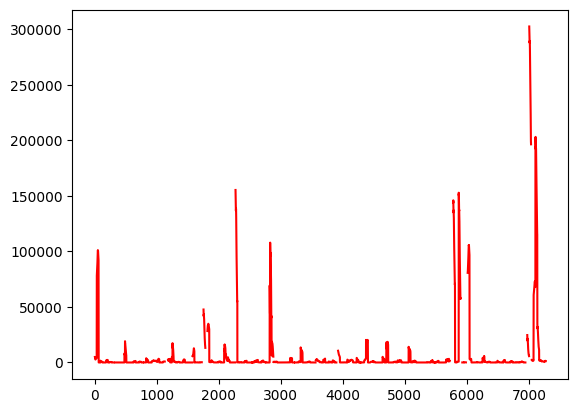

In [23]:
CausasMuerte['por_trastornos_maternos'].plot.line(color="red")

<Axes: >

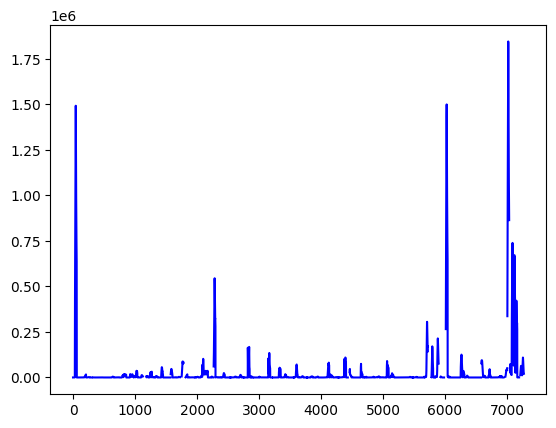

In [25]:
CausasMuerte['por_vih_sida'].plot.line(color="blue")

<Axes: >

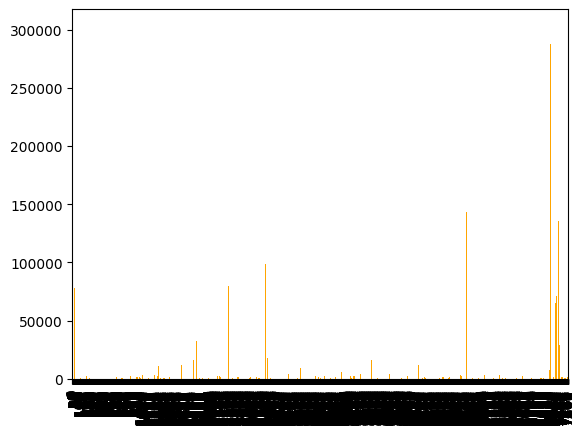

In [24]:
CausasMuerte['por_trastornos_maternos'].plot.bar(color="orange")

<Axes: >

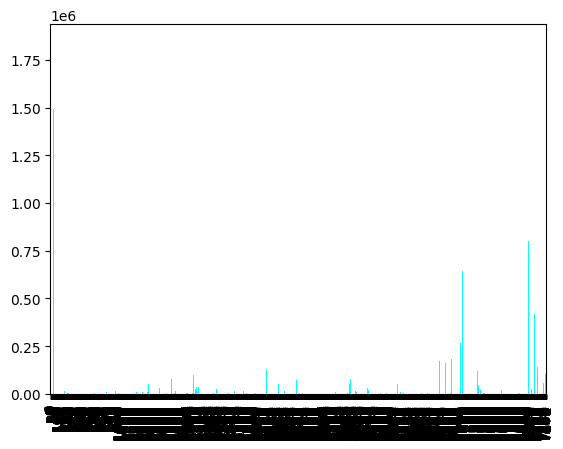

In [26]:
CausasMuerte['por_vih_sida'].plot.bar(color="cyan")

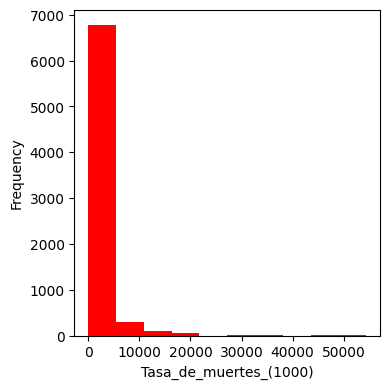

In [37]:
ax = (CausasMuerte['TotalMuertos']/1_000).plot.hist(color="red", figsize =(4,4))
ax.set_xlabel("Tasa_de_muertes_(1000)")
plt.tight_layout()
plt.show()

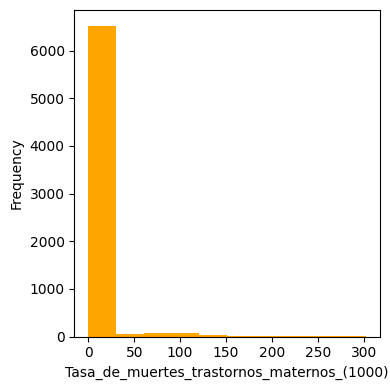

In [36]:
ax = (CausasMuerte['por_trastornos_maternos']/1_000).plot.hist(color="orange", figsize =(4,4))
ax.set_xlabel("Tasa_de_muertes_trastornos_maternos_(1000)")
plt.tight_layout()
plt.show()

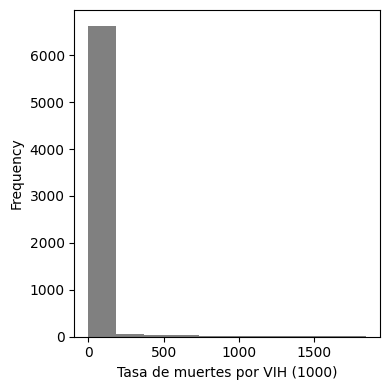

In [51]:
ax = (CausasMuerte['por_vih_sida']/1_000).plot.hist(color="gray", figsize =(4,4))
ax.set_xlabel("Tasa de muertes por VIH (1000)")
plt.tight_layout()
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)


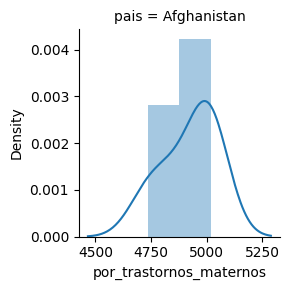

In [54]:
analisis = CausasMuerte.head()
g = sns.FacetGrid(analisis,col='pais')
g.map(sns.distplot,"por_trastornos_maternos")

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)


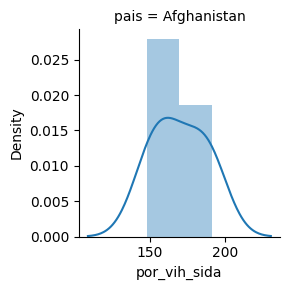

In [46]:
analisis = CausasMuerte.head()
g = sns.FacetGrid(analisis,col='pais')
g.map(sns.distplot,'por_vih_sida')

En estas dos ultimas gráficas vamos a observar el resultado de un solo pais ya que en nuestra base de datos las primera filas corresponden a un solo pais, en caso de querer observar el resultado de mas paises debemos aumentar el numero en .head() ya que por predeterminado el asume las primeras 5 filas que en este caso con de afghanistan.